In [15]:
import torch
import numpy as np
import matplotlib.pyplot as plt
from torch.autograd import Variable

Text(0, 0.5, 'Y')

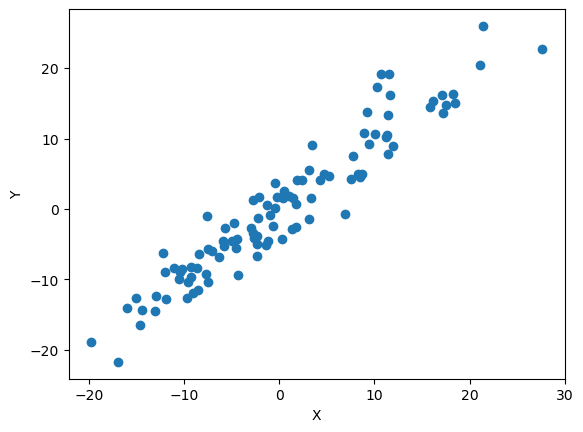

In [16]:
torch.manual_seed(2)

# create dummy data for training
x_train = torch.randn(100, 1) * 10
y_train = x_train + 3 * torch.randn(100, 1)

x_train = x_train.numpy()
y_train = y_train.numpy()

inputs = Variable(torch.from_numpy(x_train))
labels = Variable(torch.from_numpy(y_train))

plt.plot(x_train, y_train, 'o')             # plot the new X,Y 
plt.xlabel('X')
plt.ylabel('Y')

In [6]:
class LR(torch.nn.Module):

  def __init__(self, input_size, output_size):
    super().__init__()
    self.linear = torch.nn.Linear(input_size, output_size)

  def forward(self, x):    
    return self.linear(x)    
    
  def get_parameters(self):
    (w, b) = self.parameters()

    return (w[0][0].item(), b[0].item()) 

In [7]:
input_dim = 1        # takes variable 'x' 
output_dim = 1       # takes variable 'y'
learning_rate = 0.01 
epochs = 100

model = LR(input_dim, output_dim) 
   
if torch.cuda.is_available():
    model.cuda()

In [8]:
def plot_fit(model: LR, title: str):
  plt.title(title)

  w, b = model.get_parameters()
  print(w, b)
  x1 = np.array([-30, 30])

  y1 = w * x1 + b

  plt.plot(x1, y1, 'r')
  plt.scatter(x_train, y_train)
  plt.xlabel('X')
  plt.ylabel('Y')
  plt.show()

0.26434898376464844 -0.05657529830932617


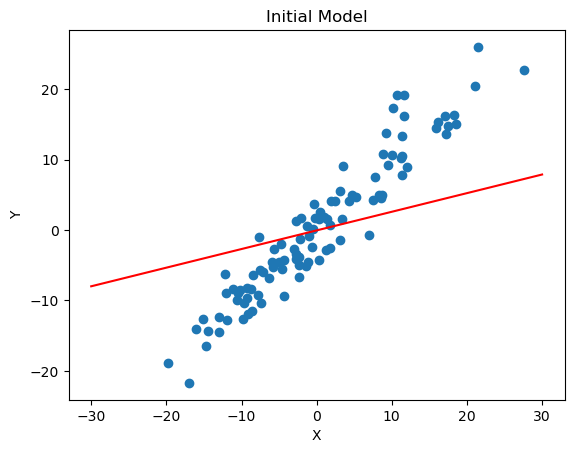

In [9]:
plot_fit(model, 'Initial Model')

In [10]:
criterion = torch.nn.MSELoss() 
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)

In [11]:
losses = []

for epoch in range(epochs):  
  # inputs = Variable(torch.from_numpy(x_train))
  # labels = Variable(torch.from_numpy(y_train))

  # clear gradient buffers because we don't want any gradient from previous epoch to carry forward, dont want to cummulate gradients
  optimizer.zero_grad()

  # get output from the model, given the inputs
  outputs = model(inputs)

  # get loss for the predicted output
  loss = criterion(outputs, labels)

  # add the lost for plotting
  losses.append(loss.item())

  # get gradients w.r.t to parameters
  loss.backward()

  # update parameters
  optimizer.step()

  print('epoch {}, loss {}'.format(epoch, loss.item()))

epoch 0, loss 57.68190383911133
epoch 1, loss 54.539520263671875
epoch 2, loss 51.6008186340332
epoch 3, loss 48.8525276184082
epoch 4, loss 46.28233337402344
epoch 5, loss 43.878692626953125
epoch 6, loss 41.630863189697266
epoch 7, loss 39.52867889404297
epoch 8, loss 37.56272506713867
epoch 9, loss 35.724185943603516
epoch 10, loss 34.0047721862793
epoch 11, loss 32.39680480957031
epoch 12, loss 30.893033981323242
epoch 13, loss 29.486738204956055
epoch 14, loss 28.171571731567383
epoch 15, loss 26.941621780395508
epoch 16, loss 25.791410446166992
epoch 17, loss 24.715723037719727
epoch 18, loss 23.709735870361328
epoch 19, loss 22.768957138061523
epoch 20, loss 21.889142990112305
epoch 21, loss 21.066333770751953
epoch 22, loss 20.296859741210938
epoch 23, loss 19.577255249023438
epoch 24, loss 18.90427017211914
epoch 25, loss 18.274904251098633
epoch 26, loss 17.686328887939453
epoch 27, loss 17.135892868041992
epoch 28, loss 16.621129989624023
epoch 29, loss 16.139728546142578
ep

Text(0.5, 0, 'epoch')

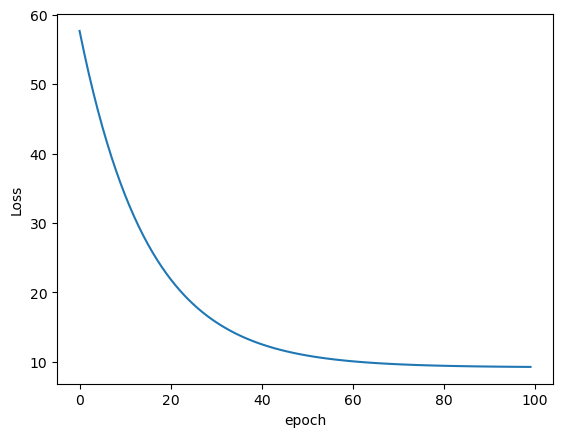

In [12]:
plt.plot(range(epochs), losses)
plt.ylabel('Loss')
plt.xlabel('epoch')

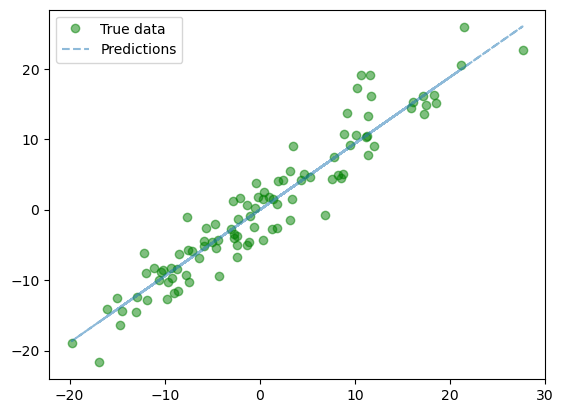

In [13]:
with torch.no_grad(): # we don't need gradients in the testing phase
  if torch.cuda.is_available():
    predicted = model(Variable(torch.from_numpy(x_train).cuda())).cpu().data.numpy()
  else:
    predicted = model(Variable(torch.from_numpy(x_train))).data.numpy()

plt.plot(x_train, y_train, 'go', label='True data', alpha=0.5)
plt.plot(x_train, predicted, '--', label='Predictions', alpha=0.5)
plt.legend(loc='best')
plt.show()


Text(0.5, 0, 'epoch')

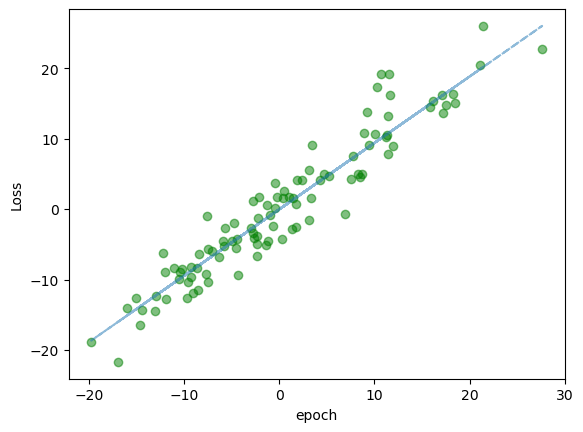

In [14]:
import matplotlib.pyplot as plt

plt.plot(x_train, y_train, 'go', label='True data', alpha=0.5)
plt.plot(x_train, predicted, '--', label='Predictions', alpha=0.5)

# plt.plot(range(epochs), losses)
plt.ylabel('Loss')
plt.xlabel('epoch')